In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000,size=100)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Import citipy to obtain cities from lat and long
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

79

In [6]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2075a61b97e9dfc66fa3ba5f897a45dc


In [8]:
# Import the datetime module from the datetime library
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Records {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

 # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        try:
            city_rain = city_weather["rain"]["3h"]
        except:
            city_rain = 0
        try: 
            city_snow = city_weather["snow"]["3h"]
        except:
            city_snow = 0
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Rainfall (inches)": city_rain,
                          "Snowfall (inches)": city_snow,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Records 1 of Set 1 | payson
Processing Records 2 of Set 1 | vaini
Processing Records 3 of Set 1 | san cristobal
Processing Records 4 of Set 1 | caldas
Processing Records 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Records 6 of Set 1 | parabel
Processing Records 7 of Set 1 | bethel
Processing Records 8 of Set 1 | ushuaia
Processing Records 9 of Set 1 | caravelas
Processing Records 10 of Set 1 | chapais
Processing Records 11 of Set 1 | namatanai
Processing Records 12 of Set 1 | hilo
Processing Records 13 of Set 1 | hermanus
Processing Records 14 of Set 1 | mataura
Processing Records 15 of Set 1 | carnarvon
Processing Records 16 of Set 1 | los llanos de aridane
Processing Records 17 of Set 1 | malwan
City not found. Skipping...
Processing Records 18 of Set 1 | pangnirtung
Processing Records 19 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Records 20 of Set 1 | hobart
Processing 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Rainfall (inches),Snowfall (inches),Country,Date
0,Payson,40.04,-111.73,39.00,47,90,9.17,0.00,0.00,US,2020-01-14 04:34:55
1,Vaini,-21.20,-175.20,86.00,74,20,6.93,0.00,0.00,TO,2020-01-14 04:31:11
2,San Cristobal,7.77,-72.22,77.00,69,40,4.70,0.00,0.00,VE,2020-01-14 04:39:50
3,Caldas,6.09,-75.64,59.00,93,40,3.36,0.00,0.00,CO,2020-01-14 04:39:50
4,Parabel,58.70,81.48,11.44,91,100,12.01,0.00,0.38,RU,2020-01-14 04:39:51
5,Bethel,41.37,-73.41,43.00,93,90,3.36,0.00,0.00,US,2020-01-14 04:39:52
6,Ushuaia,-54.80,-68.30,48.20,100,90,8.05,0.00,0.00,AR,2020-01-14 04:28:45
7,Caravelas,-17.71,-39.25,78.87,83,51,10.69,0.00,0.00,BR,2020-01-14 04:39:53
8,Chapais,49.78,-74.85,-13.00,75,1,3.36,0.00,0.00,CA,2020-01-14 04:39:54
9,Namatanai,-3.67,152.43,84.06,74,88,15.37,1.94,0.00,PG,2020-01-14 04:39:55


In [11]:
# Reorder Columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Payson,US,2020-01-14 04:34:55,40.04,-111.73,39.00,47,90,9.17
1,Vaini,TO,2020-01-14 04:31:11,-21.20,-175.20,86.00,74,20,6.93
2,San Cristobal,VE,2020-01-14 04:39:50,7.77,-72.22,77.00,69,40,4.70
3,Caldas,CO,2020-01-14 04:39:50,6.09,-75.64,59.00,93,40,3.36
4,Parabel,RU,2020-01-14 04:39:51,58.70,81.48,11.44,91,100,12.01
5,Bethel,US,2020-01-14 04:39:52,41.37,-73.41,43.00,93,90,3.36
6,Ushuaia,AR,2020-01-14 04:28:45,-54.80,-68.30,48.20,100,90,8.05
7,Caravelas,BR,2020-01-14 04:39:53,-17.71,-39.25,78.87,83,51,10.69
8,Chapais,CA,2020-01-14 04:39:54,49.78,-74.85,-13.00,75,1,3.36
9,Namatanai,PG,2020-01-14 04:39:55,-3.67,152.43,84.06,74,88,15.37


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Import the time module
import time
# Get today's date in seconds
today = time.strftime("%x")
today

'01/13/20'

In [14]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

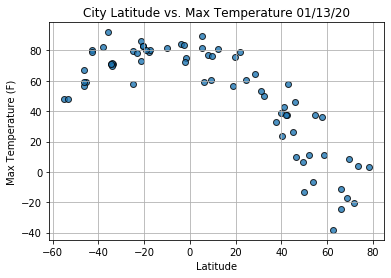

In [15]:
# Build the scatter plot for latitude vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black",linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

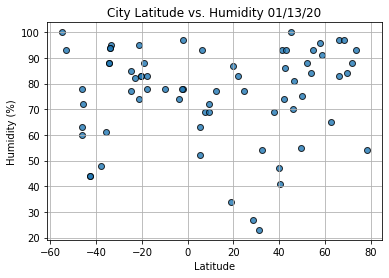

In [16]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black",linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

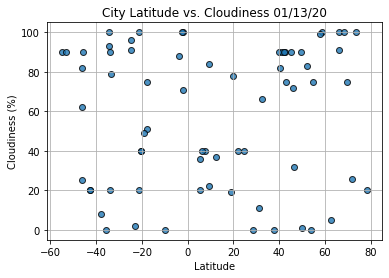

In [17]:
# Build the scatter plot for latitude vs Cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black",linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

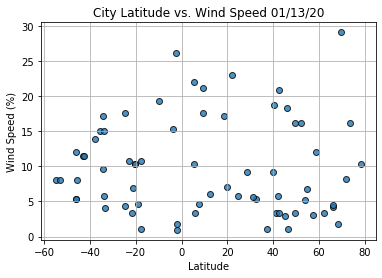

In [18]:
# Build the scatter plot for latitude vs Wind Speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black",linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [19]:
# Import linear regression from the scipy stats module
from scipy.stats import linregress

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Payson,US,2020-01-14 04:34:55,40.04,-111.73,39.00,47,90,9.17
2,San Cristobal,VE,2020-01-14 04:39:50,7.77,-72.22,77.00,69,40,4.70
3,Caldas,CO,2020-01-14 04:39:50,6.09,-75.64,59.00,93,40,3.36
4,Parabel,RU,2020-01-14 04:39:51,58.70,81.48,11.44,91,100,12.01
5,Bethel,US,2020-01-14 04:39:52,41.37,-73.41,43.00,93,90,3.36


In [22]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

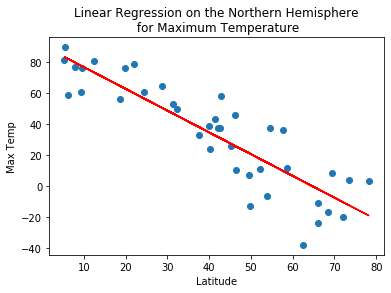

In [23]:
# Linear regression on Northern Hemisphere Max Temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(1,-40))

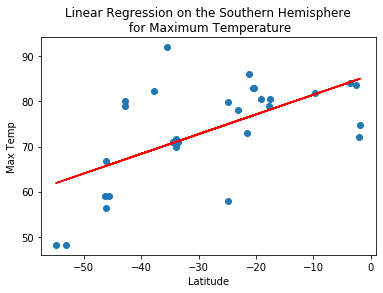

In [24]:
# Linear regression on southern Hemisphere for Max Temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-23,45))

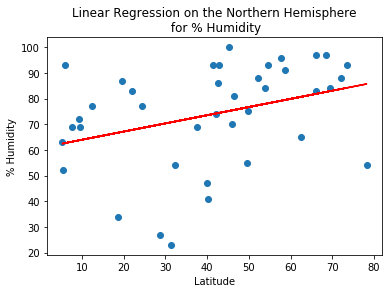

In [25]:
# Linear regression on Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\n for % Humidity', 
                       '% Humidity',(45,18))

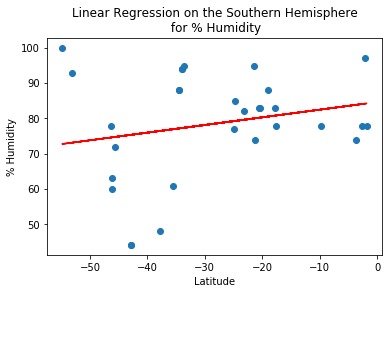

In [26]:
# Linear regression on southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere\n for % Humidity', 
                       '% Humidity',(-23,15))

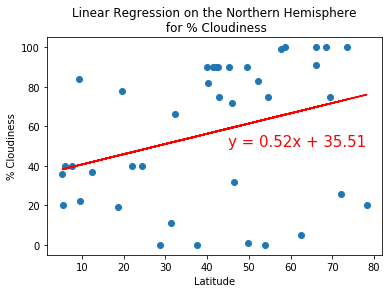

In [27]:
# Linear regression on Northern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\n for % Cloudiness', 
                       '% Cloudiness',(45,50))

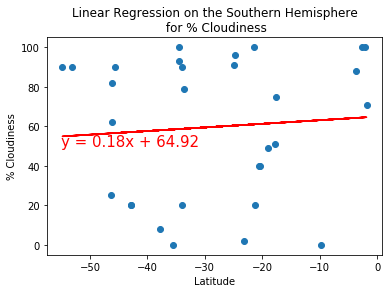

In [28]:
# Linear regression on southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere\n for % Cloudiness', 
                       '% Cloudiness',(-55,50))

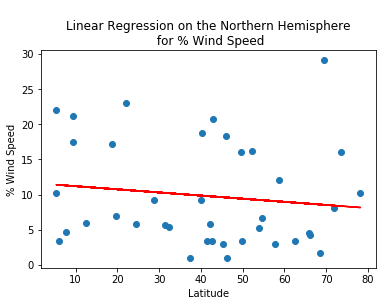

In [29]:
# Linear regression on northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\n for % Wind Speed', 
                       '% Wind Speed',(0,35))

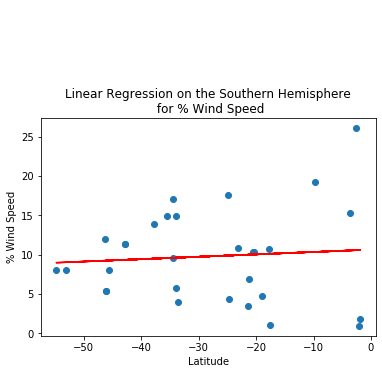

In [30]:
# Linear regression on southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere\n for % Wind Speed', 
                       '% Wind Speed',(-25,40))